<a href="https://colab.research.google.com/github/kimhwijin/TensorflowWithKeras/blob/master/Autoencoder/Denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as K
import matplotlib.pyplot as plt

Denosing Autoencoder
<br>Overcomplete Autoencoder 부류에 속한다.
<br>은닉층의 차원 n_hidden 이 입력 차원 m 보다 큰 특징이 있다.
<br>코드 목적 :
<br>입력(노이즈를 띄는 손상된 이미지)의 노이즈를 제거해서 또렷한 이미지로 변경한다.

In [2]:
np.random.seed(11)
tf.random.set_seed(11)
batch_size = 256
max_epochs = 50
learning_rate = 0.001
#hidden_dim = 128
hidden_dim = 1024
output_dim = 784

In [3]:
(x_train, _), (x_test, _) = K.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
class Encoder(K.layers.Layer):
    def __init__(self, hidden_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = K.layers.Dense(hidden_dim, activation='relu')
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return activation
class Decoder(K.layers.Layer):
    def __init__(self, output_dim):
        super(Decoder, self).__init__()
        self.output_layer = K.layers.Dense(output_dim, activation='relu')
    
    def call(self, encoded):
        activation = self.output_layer(encoded)
        return activation

class AutoEncoder(K.Model):
    def __init__(self, hidden_dim, output_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder(hidden_dim)
        self.decoder = Decoder(output_dim)
        self.loss = []
    
    def call(self, input_features):
        encoded = self.encoder(input_features)
        reconstructed = self.decoder(encoded)
        return reconstructed

In [5]:
model = AutoEncoder(hidden_dim, output_dim)
optimizer = K.optimizers.Adam(0.001)
model.compile(loss='mse', optimizer=optimizer)
loss = model.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), batch_size=batch_size, epochs=max_epochs)

Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.0457 - val_loss: 0.0296
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0277 - val_loss: 0.0261
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0256 - val_loss: 0.0248
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0245 - val_loss: 0.0242
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0240 - val_loss: 0.0239
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0236 - val_loss: 0.0236
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0233 - val_loss: 0.0232
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0229 - val_loss: 0.0228
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0222 - val_loss: 0.0223

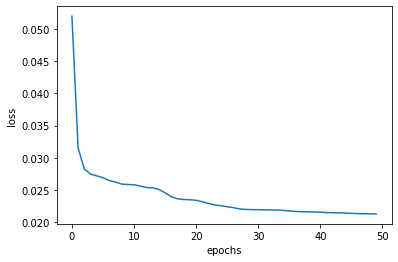

In [14]:
#hidden dim = 128
plt.plot(range(max_epochs), loss.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

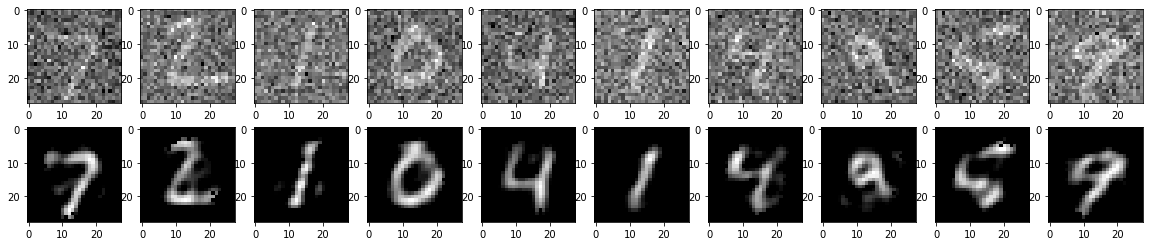

In [21]:
#hidden dim = 128
number = 10
plt.figure(figsize=(20, 4))
for index in range(number):
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28,28), cmap='gray')

    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test_noisy)[index].numpy().reshape(28,28), cmap='gray' )
plt.show()


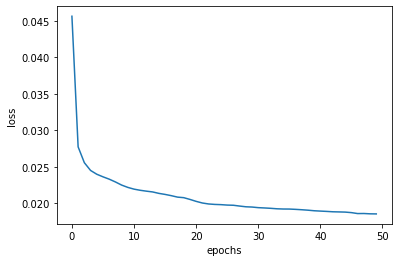

In [6]:
#hidden dim = 1024
plt.plot(range(max_epochs), loss.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

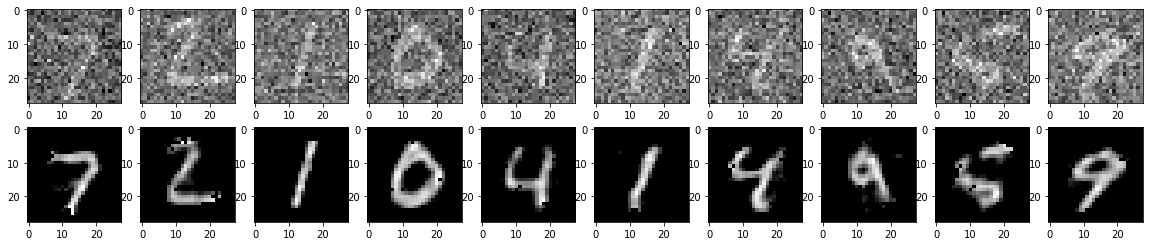

In [7]:
#hidden dim = 1024
number = 10
plt.figure(figsize=(20, 4))
for index in range(number):
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28,28), cmap='gray')

    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test_noisy)[index].numpy().reshape(28,28), cmap='gray' )
plt.show()